In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from tabulate import tabulate

# Data Preparation

In [2]:
data= "Downloads/loan_approval_dataset.csv"
loandata = pd.read_csv(data)
print("data length: ", loandata.shape)
print(loandata.dtypes)
print("\nCount of Categorical Variables: 3 \nCount of Numerical Variables: 10")

data length:  (4269, 13)
loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

Count of Categorical Variables: 3 
Count of Numerical Variables: 10


**Cleaning of Dataset**

In [3]:
loandata.columns = loandata.columns.str.strip() #removing the white space in front of the variable names

In [4]:
#Check for missing values 
null_values = loandata.isnull().sum()
print("Null Values:\n", null_values)

Null Values:
 loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [5]:
#checking for duplicate rows 
print("Numer of duplicate rows:", loandata.duplicated().sum())


Numer of duplicate rows: 0


In [6]:
loandata.nunique()

loan_id                     4269
no_of_dependents               6
education                      2
self_employed                  2
income_annum                  98
loan_amount                  378
loan_term                     10
cibil_score                  601
residential_assets_value     278
commercial_assets_value      188
luxury_assets_value          379
bank_asset_value             146
loan_status                    2
dtype: int64

From the above overview, we have confirmed that: 
1) There are no null values & duplicates 
2) Categorical variables: no_of_dependents, education, self_employed, loan_status
3) Total rows: 4269


# Exploratory Analysis

In [7]:
#remove loan_id from the dataset since it does not provide any meaningful insights.
loandata = loandata.drop(['loan_id'], axis=1)

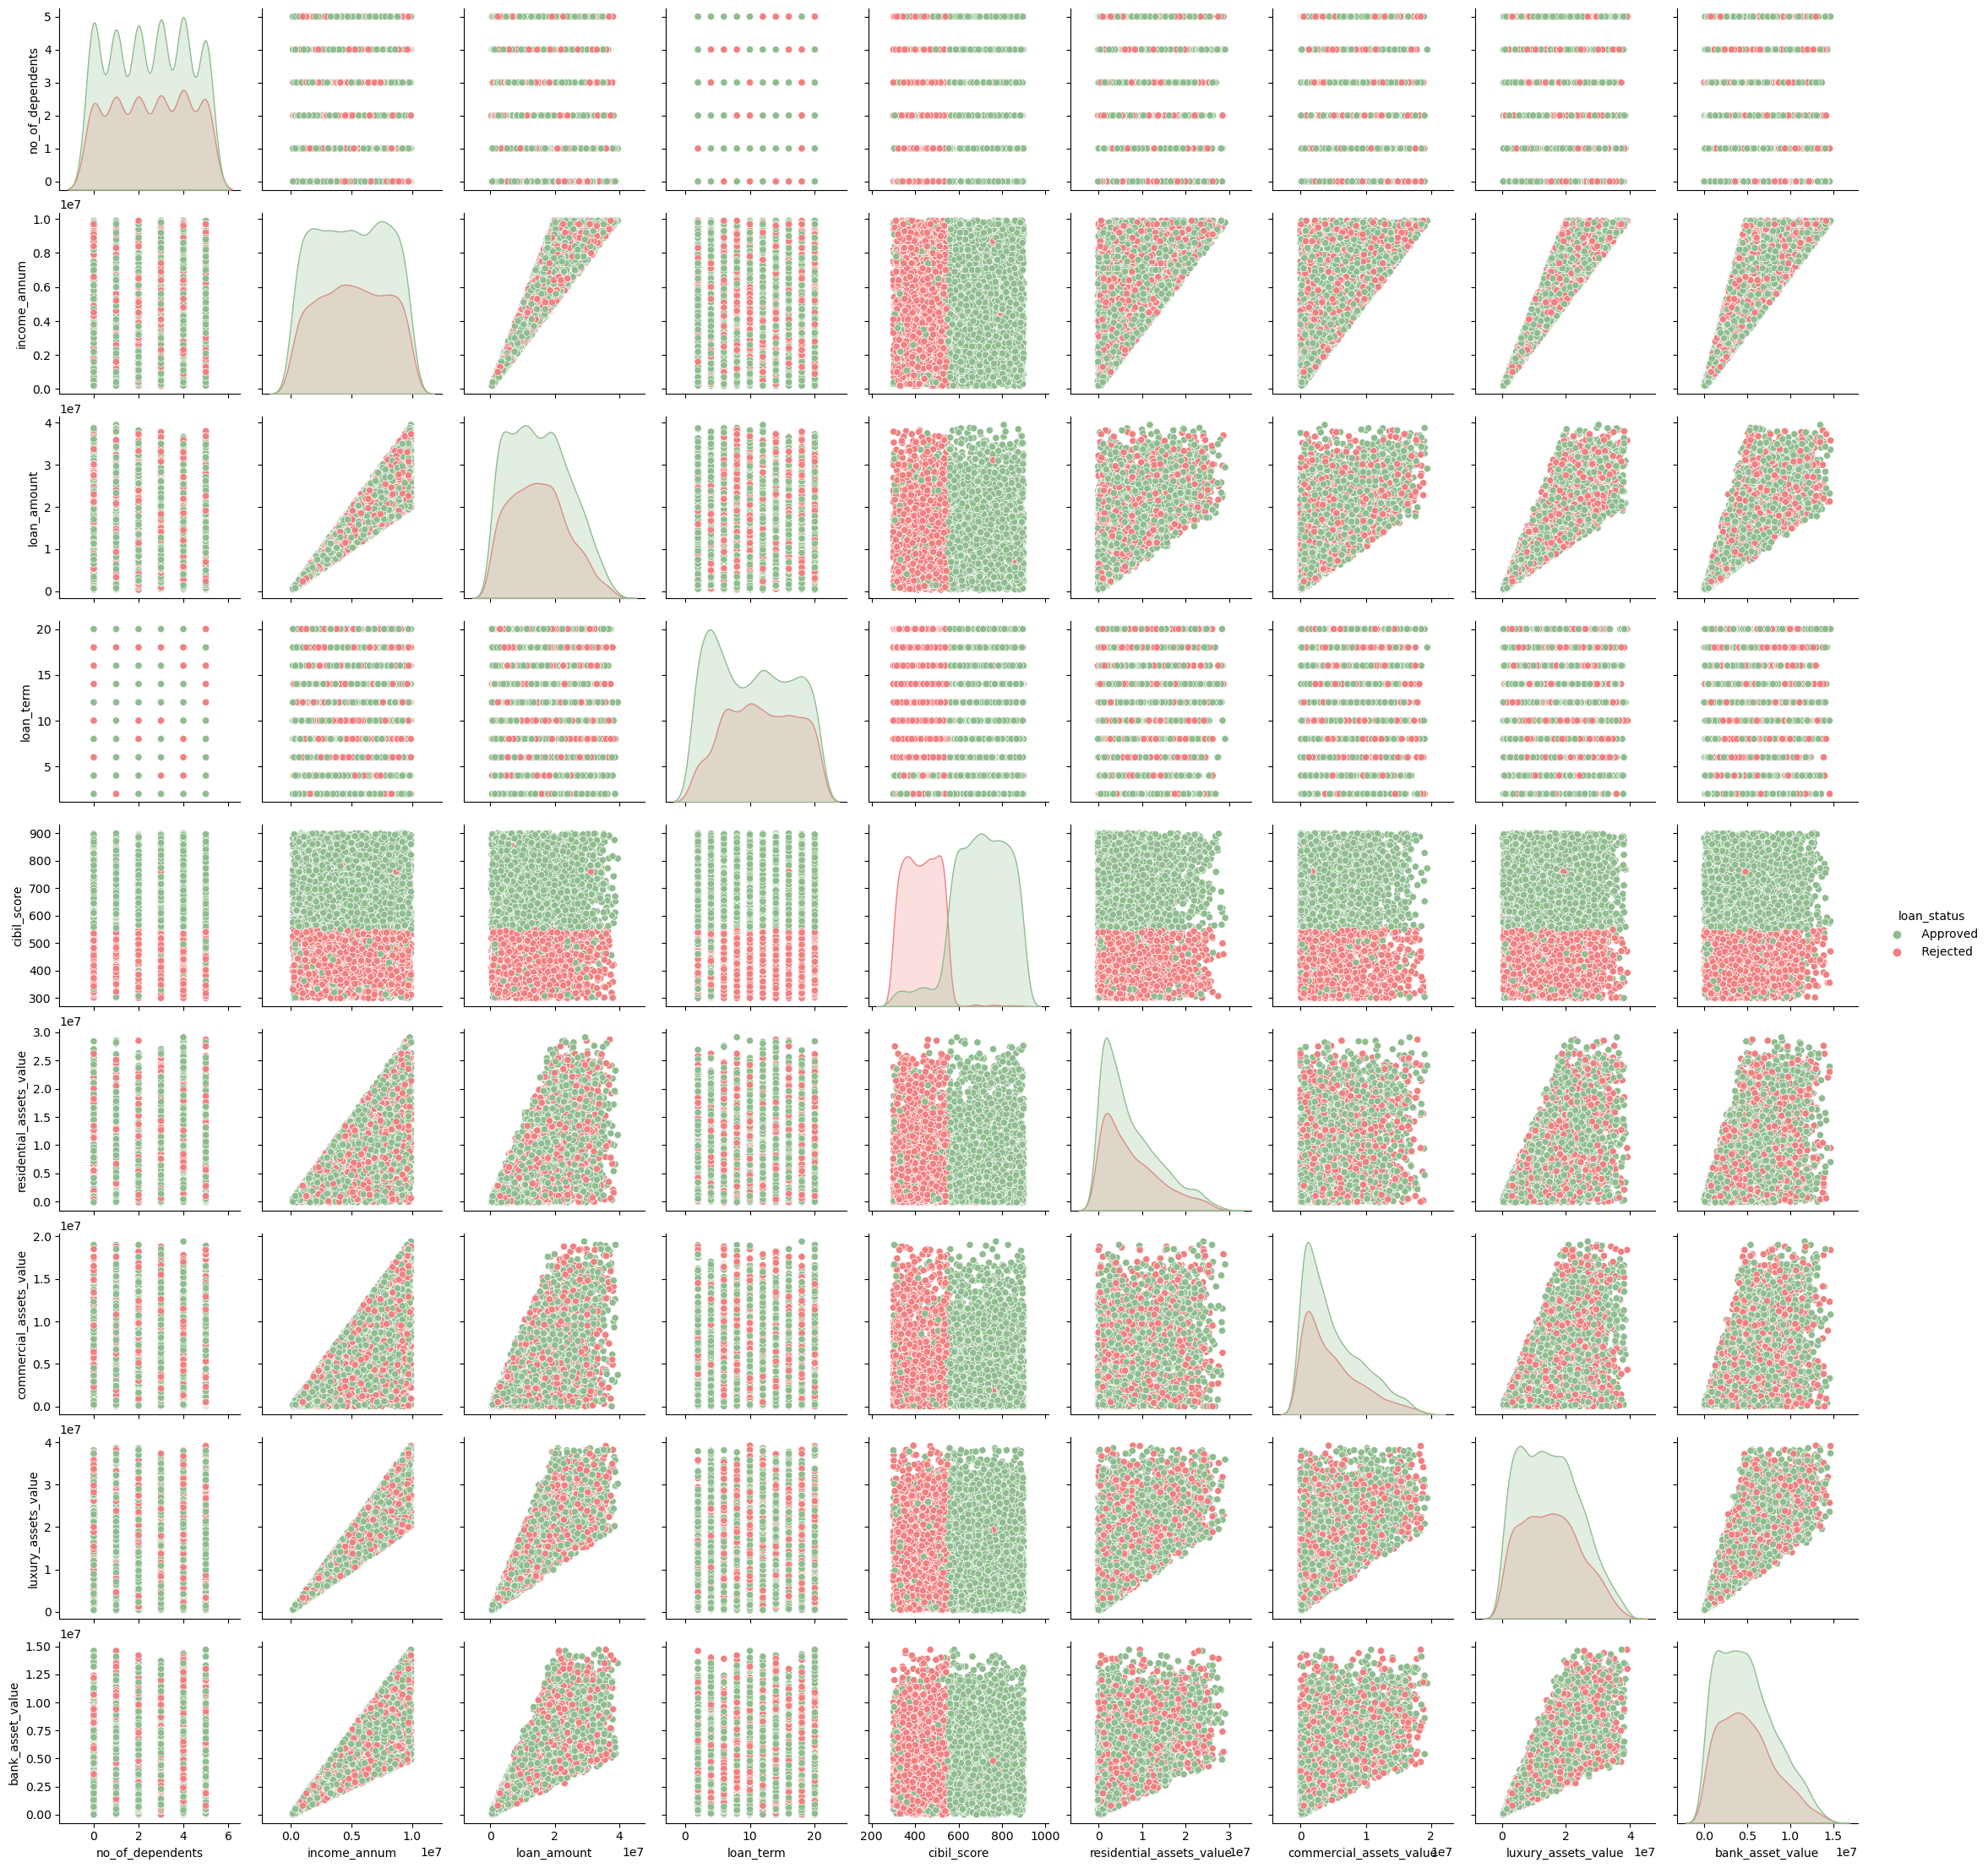

In [8]:
custom_colour =['darkseagreen', 'lightcoral']
sns.pairplot(loandata, hue='loan_status', palette = custom_colour)
plt.show()

From the above pairplots, we can observe that there are some variables having positive correlation with other variables: loan_amount & income_annum, luxury_assets_value & bank_asset_value, income_annum & luxury_assets_value... 

# Data Visualisation: Numeric Data

**Loan Amount**

In [9]:
#statistical summary for loan amount
loandata.describe()

no_of_dependents  income_annum   loan_amount    loan_term  cibil_score  \
count       4269.000000  4.269000e+03  4.269000e+03  4269.000000  4269.000000   
mean           2.498712  5.059124e+06  1.513345e+07    10.900445   599.936051   
std            1.695910  2.806840e+06  9.043363e+06     5.709187   172.430401   
min            0.000000  2.000000e+05  3.000000e+05     2.000000   300.000000   
25%            1.000000  2.700000e+06  7.700000e+06     6.000000   453.000000   
50%            3.000000  5.100000e+06  1.450000e+07    10.000000   600.000000   
75%            4.000000  7.500000e+06  2.150000e+07    16.000000   748.000000   
max            5.000000  9.900000e+06  3.950000e+07    20.000000   900.000000   

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count              4.269000e+03             4.269000e+03         4.269000e+03   
mean               7.472617e+06             4.973155e+06         1.512631e+07   
std                6.503637e+06             4.388966e+06         9.103754e+06   
min               -1.000000e+05             0.000000e+00         3.000000e+05   
25%                2.200000e+06             1.300000e+06         7.500000e+06   
50%                5.600000e+06             3.700000e+06         1.460000e+07   
75%                1.130000e+07             7.600000e+06         2.170000e+07   
max                2.910000e+07             1.940000e+07         3.920000e+07   

       bank_asset_value  
count      4.269000e+03  
mean       4.976692e+06  
std        3.250185e+06  
min        0.000000e+00  
25%        2.300000e+06  
50%        4.600000e+06  
75%        7.100000e+06  
max        1.470000e+07

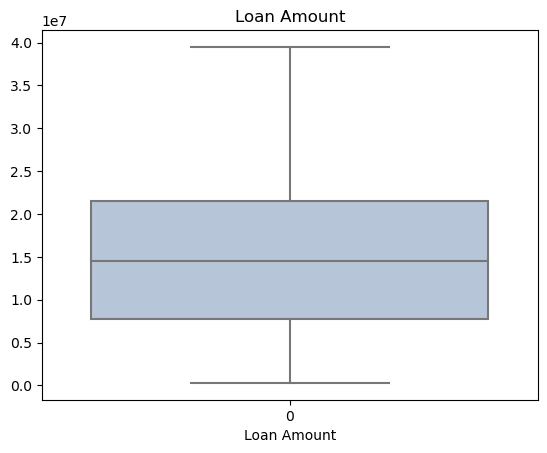

In [10]:
sns.boxplot(loandata['loan_amount'], color='lightsteelblue')
plt.title('Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

From the boxplot above, we see that there are no outliers in loan_amount.

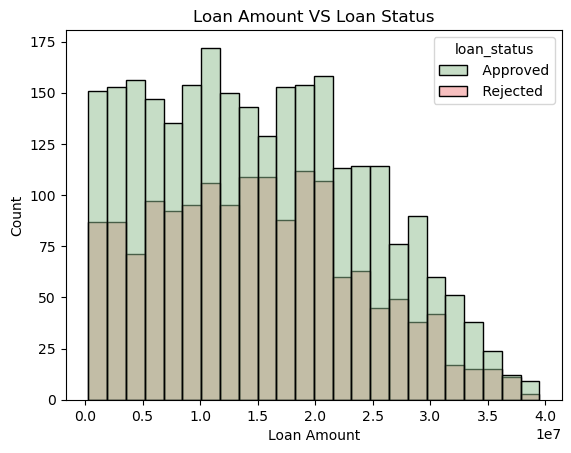

In [11]:
custom_colour =['darkseagreen', 'lightcoral']
sns.histplot(loandata, x='loan_amount', hue='loan_status', palette=custom_colour)
plt.title("Loan Amount VS Loan Status")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

Both approved & rejected loans have the same trends based on the different loan amounts. We do not see a strong relationship between the loan status and the loan amount in the histogram.

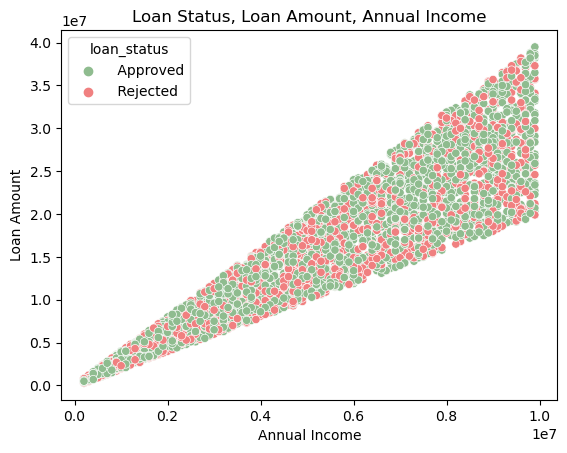

In [12]:
sns.scatterplot(x=loandata['income_annum'], y= loandata['loan_amount'], hue=loandata['loan_status'], palette=custom_colour)
plt.title("Loan Status, Loan Amount, Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()

From the scatter plot above, we can see that 
- When annual income increases, loan amount tend to increase as well. 
- Applicants with lower annual incomes tend to have a narrower range of loan amounts compared to those with higher incomes. Higher income applicants exhibit a wider range of loan amounts, suggesting greater flexibility in borrowing decisions. Lenders often require loan amounts to align with the applicant's annual income to ensure repayment capability. It's reasonable to infer that applicants with higher incomes have more flexibility in loan amounts.
- An interesting insight observed: Applicants with annual income on the higher end are still rejected when they apply for a lower loan amount (lower right of the scatter plot filled with red dots). Why is it so?

In [13]:
#filtering out applicants who have high income yet where rejected 
loandata.loc[(loandata['income_annum'] == loandata['income_annum'].max()) & (loandata['loan_status'] ==' Rejected')]

no_of_dependents      education self_employed  income_annum  \
82                   2   Not Graduate           Yes       9900000   
157                  5   Not Graduate           Yes       9900000   
1179                 5       Graduate            No       9900000   
1272                 5   Not Graduate            No       9900000   
1409                 3       Graduate           Yes       9900000   
1547                 1       Graduate           Yes       9900000   
1890                 5       Graduate            No       9900000   
2862                 4       Graduate            No       9900000   
2869                 4       Graduate            No       9900000   
3000                 1   Not Graduate           Yes       9900000   
3548                 2   Not Graduate            No       9900000   
4191                 2       Graduate           Yes       9900000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
82       21200000         16          363                  25500000   
157      33300000          6          364                   5300000   
1179     35700000         10          392                   7900000   
1272     35800000         20          470                   9500000   
1409     29900000         20          490                  10500000   
1547     34100000         14          371                  24400000   
1890     24600000          2          530                  24200000   
2862     30000000         18          496                  10400000   
2869     26100000          2          481                  14500000   
3000     25700000          2          340                  15600000   
3548     19900000          6          312                  21400000   
4191     37300000          8          385                    600000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
82                   11400000             26600000           6800000   
157                  18700000             27800000           8300000   
1179                  4300000             39200000          13000000   
1272                 18400000             39100000          14700000   
1409                  9100000             27100000           7400000   
1547                  7100000             29300000           6200000   
1890                 12800000             20400000          13000000   
2862                  8000000             29300000          13800000   
2869                  5000000             23600000           9300000   
3000                 18800000             29500000          11800000   
3548                  2200000             31400000          11000000   
4191                   900000             27400000          14200000   

     loan_status  
82      Rejected  
157     Rejected  
1179    Rejected  
1272    Rejected  
1409    Rejected  
1547    Rejected  
1890    Rejected  
2862    Rejected  
2869    Rejected  
3000    Rejected  
3548    Rejected  
4191    Rejected

**CREDIT SCORE - CIBIL SCORE**

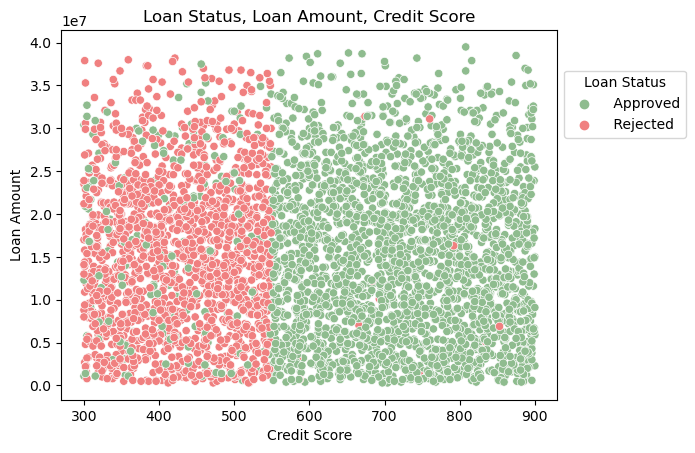

In [14]:
sns.scatterplot(x=loandata['cibil_score'], y= loandata['loan_amount'], hue=loandata['loan_status'],palette=custom_colour)
plt.title("Loan Status, Loan Amount, Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.legend(title='Loan Status', loc='center left', bbox_to_anchor=(1,0.8))

plt.show()

There is a strong relationship between the credit score and loan status. We can observe that a cibil_score of around 530-550 separates the loans status into approved and rejected very clearly. 

However, we also observed that some of the applicants with high credit scores were still rejected.

In [15]:
#filtering out applicants with high credit score but were still rejected 
loandata.loc[(loandata['cibil_score'] > 740) & (loandata['loan_status'] ==' Rejected')].sort_values(['cibil_score'], ascending= False)


no_of_dependents      education self_employed  income_annum  \
559                  2       Graduate           Yes        200000   
3527                 0       Graduate            No       1800000   
911                  0       Graduate           Yes       1300000   
3213                 1   Not Graduate           Yes       4300000   
236                  3       Graduate           Yes        900000   
4099                 3       Graduate            No       8700000   
1446                 1       Graduate            No        300000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
559        500000          6          885                   -100000   
3527      6900000         10          853                    900000   
911       4800000          4          835                    500000   
3213     16300000         14          792                    400000   
236       3500000          4          770                    700000   
4099     31100000         16          760                    400000   
1446      1200000         18          747                    100000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
559                         0               300000            200000   
3527                   400000              3700000           1700000   
911                    100000              3300000            800000   
3213                   400000             10200000           4000000   
236                         0              2000000            600000   
4099                  1800000             19300000           4800000   
1446                        0               700000            200000   

     loan_status  
559     Rejected  
3527    Rejected  
911     Rejected  
3213    Rejected  
236     Rejected  
4099    Rejected  
1446    Rejected

We cannot tell from this dataframe directly what are the causes to the rejection of loans. However, we will analyse the assets value variables to see if there are any valuable findings.

**RESIDENTIAL ASSETS VALUE, COMMERCIAL ASSETS VALUE, LUXURY ASSETS VALUE, BANK ASSET VALUE**

- Residential Assets Value: This is likely a measure of the total value of residential properties or real estate assets owned by the individuals or organizations in the dataset.

- Commercial Assets Value: This could represent the total value of commercial properties or business-related assets owned by the individuals or organizations in the dataset. Commercial properties might include office buildings, retail spaces, warehouses, and similar assets.

- Luxury Assets Value: This might refer to the total value of high-end or luxury items owned by the individuals or organizations. These could include items such as luxury vehicles, valuable artwork, jewelry, and other premium possessions.

- Bank Asset Value: This is possibly the total value of assets held by the bank or lending institution itself. It might include cash reserves, investments, and other financial assets.

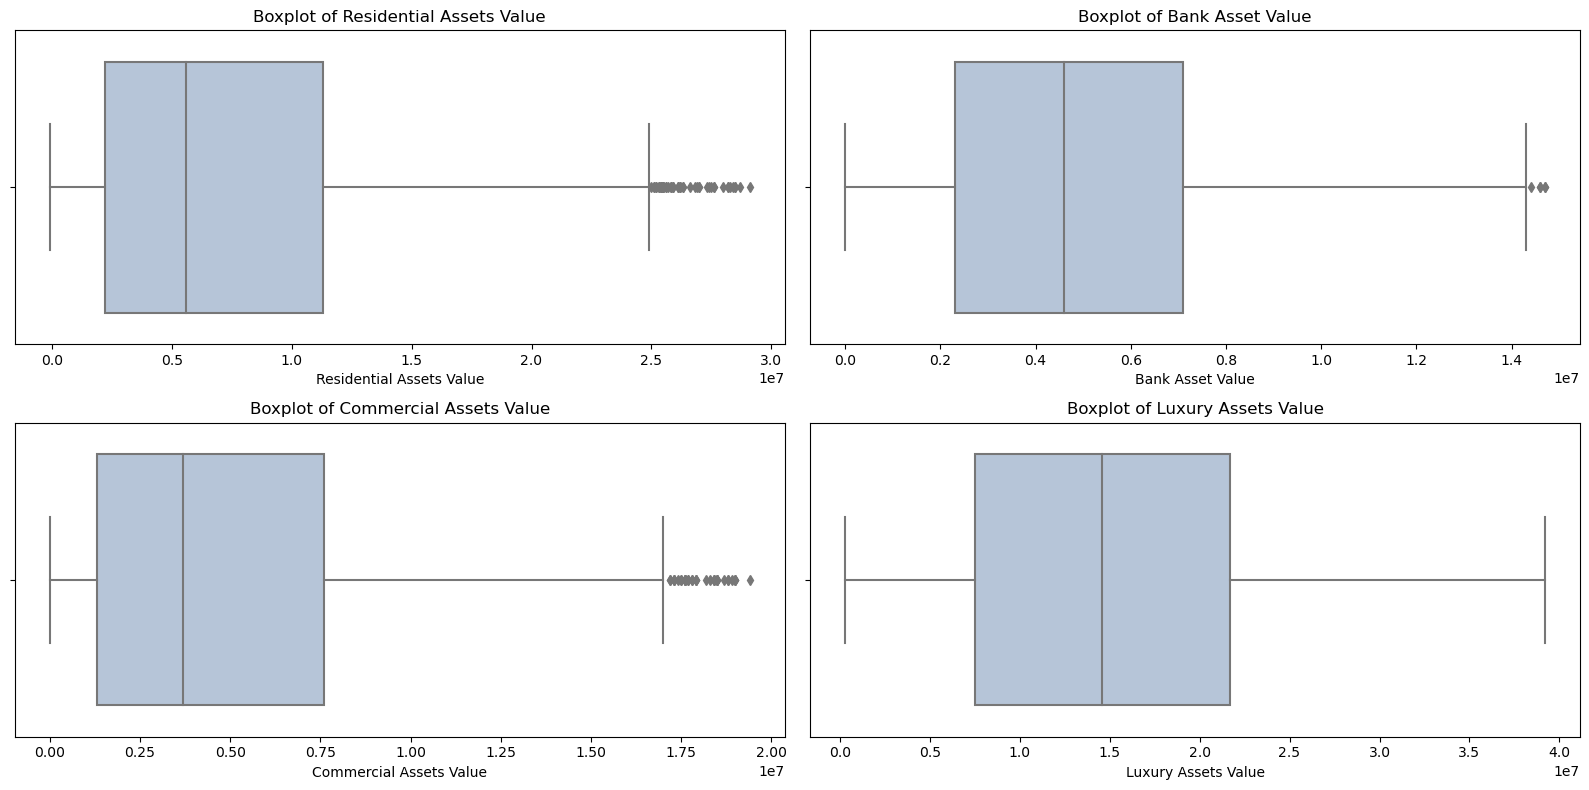

In [16]:
asset_categories = ['residential_assets_value', 'bank_asset_value', 'commercial_assets_value', 'luxury_assets_value']

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 8))  # Adjust figsize as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each asset category in a subplot
for i, (category, ax) in enumerate(zip(asset_categories, axes)):
    sns.boxplot(x=loandata[category], ax=ax, color='lightsteelblue')  # Plot boxplot
    ax.set_title(f'Boxplot of {category.replace("_", " ").title()}')  # Customize subplot title
    ax.set_xlabel(category.replace("_", " ").title())  # Set x-axis label

# Adjust layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

There are outliers for residential, commercial and bank asset value. 

<Axes: >

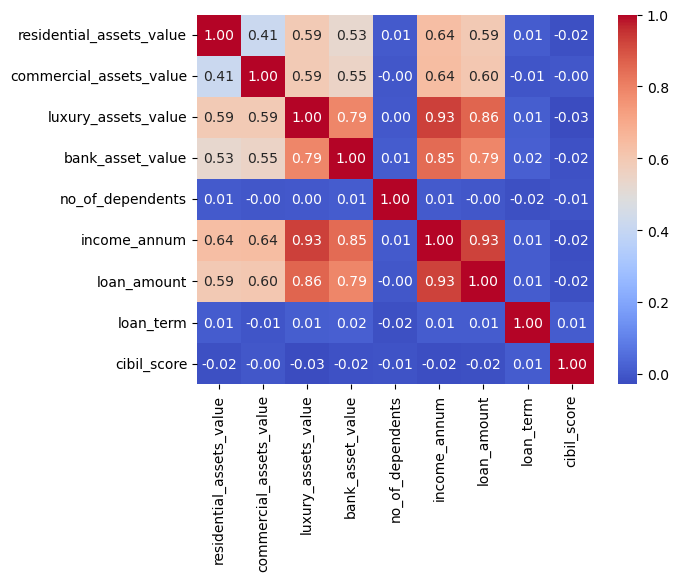

In [17]:
loan_asset = loandata[['residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'no_of_dependents',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score']]
loan_asset_corr = loan_asset.corr()
sns.heatmap(loan_asset_corr, annot=True, fmt=".2f", cmap="coolwarm")


All the asset values have moderate to strong positive linear relationships with annual income. Applicants who have more annual income tend to have more flexibility on purchasing the properties with higher asset values especially the luxury assets value. To our surprise, cibil_score and annual_income has barely any relationship at all. We thought there will be a correlation between the 2 variables - the higher your income, the higher your credit score. 


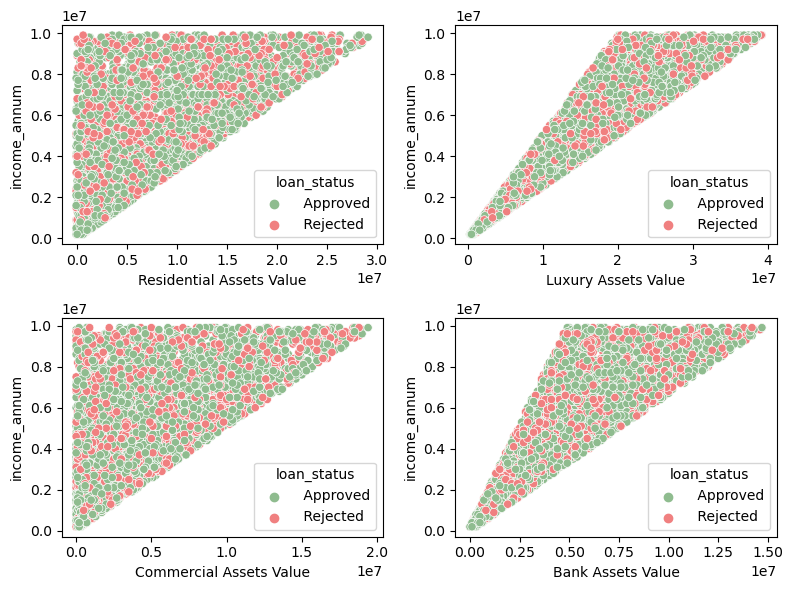

In [18]:
fig,axes = plt.subplots(2, 2, figsize = (8, 6))

sns.scatterplot(loandata, x = 'residential_assets_value', y= 'income_annum', hue = 'loan_status', palette = custom_colour,ax = axes[0,0])
axes[0,0].set_xlabel("Residential Assets Value")

sns.scatterplot(loandata, x = 'commercial_assets_value', y= 'income_annum', hue = 'loan_status',palette = custom_colour, ax = axes[1,0])
axes[1,0].set_xlabel("Commercial Assets Value")

sns.scatterplot(loandata, x = 'luxury_assets_value', y= 'income_annum', hue = 'loan_status',palette = custom_colour, ax = axes[0,1])
axes[0,1].set_xlabel("Luxury Assets Value")

sns.scatterplot(loandata, x = 'bank_asset_value', y= 'income_annum', hue = 'loan_status',palette = custom_colour, ax = axes[1,1])
axes[1,1].set_xlabel("Bank Assets Value")

plt.tight_layout()
plt.show()


- In the scatter plots for residential_assets_value and commercial_assets_value, we observe right triangles that divide the plots into two sections. This pattern suggests a threshold effect in the relationship between annual income and these asset values. When the asset value surpasses a certain threshold, there is a notable increase in annual income.

- Conversely, the obtuse triangles seen in luxury_assets_value and bank_asset_value indicate a different type of relationship. The smaller triangle for luxury_assets_value, compared to bank_asset_value, suggests a strong correlation between luxury asset value and annual income, with higher variability in annual income for a given luxury asset value. In essence, luxury assets can be a reliable indicator of higher annual income, but there are exceptions where the relationship may vary significantly.



**LOAN TERM**

In the heatmap from the previous section, we observed that there is no meaningful linear relationship between loan term and any other variables. However, we can still explore more on loan term!

In [19]:
cross_loan_term = pd.crosstab(index=loandata['loan_term'], columns=loandata['loan_status'])
cross_loan_term['Total'] = cross_loan_term[' Approved'] + cross_loan_term[' Rejected'] 
cross_loan_term['Approved_percentage'] = (cross_loan_term[' Approved']/cross_loan_term['Total'])*100
cross_loan_term['Rejected_percentage'] = (cross_loan_term[' Rejected']/cross_loan_term['Total'])*100
cross_loan_term

loan_status   Approved   Rejected  Total  Approved_percentage  \
loan_term                                                       
2                  315         89    404            77.970297   
4                  366         81    447            81.879195   
6                  282        208    490            57.551020   
8                  220        166    386            56.994819   
10                 229        207    436            52.522936   
12                 276        180    456            60.526316   
14                 239        166    405            59.012346   
16                 236        176    412            57.281553   
18                 257        165    422            60.900474   
20                 236        175    411            57.420925   

loan_status  Rejected_percentage  
loan_term                         
2                      22.029703  
4                      18.120805  
6                      42.448980  
8                      43.005181  
10                     47.477064  
12                     39.473684  
14                     40.987654  
16                     42.718447  
18                     39.099526  
20                     42.579075

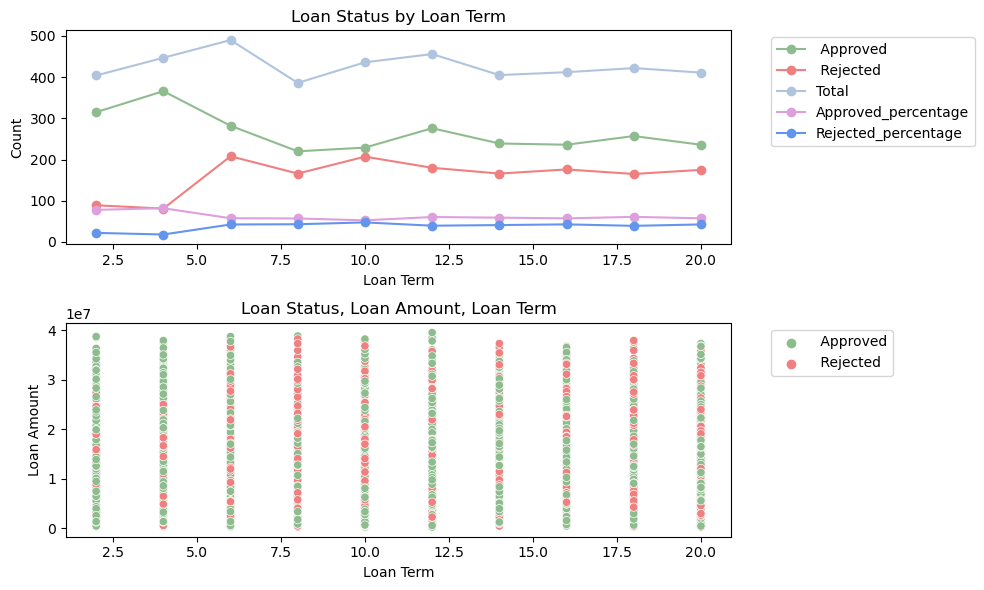

In [20]:
fig,axes = plt.subplots(2,1, figsize=(10,6))
custom_colors= ['darkseagreen', 'lightcoral','lightsteelblue','plum', 'lemonchiffon']
cross_loan_term.plot(kind='line', marker='o', ax = axes[0], color=['darkseagreen', 'lightcoral','lightsteelblue','plum', 'cornflowerblue'])
axes[0].set_xlabel('Loan Term')
axes[0].set_ylabel('Count')
axes[0].set_title('Loan Status by Loan Term')
axes[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

sns.scatterplot(loandata, x = 'loan_term', y = 'loan_amount', hue = 'loan_status', palette= custom_colour, ax = axes[1])
axes[1].set_title("Loan Status, Loan Amount, Loan Term")
axes[1].set_xlabel("Loan Term")
axes[1].set_ylabel("Loan Amount")
axes[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.tight_layout()
plt.show()

#change to stack bar


- In this dataset, the loan term of 2 years stands out with one of the highest approval rates among different loan terms, second only to the 4-year term which receives the most approvals. Conversely, as loan terms extend beyond 4 years, the likelihood of rejection increases noticeably, accompanied by a decline in approval rates. Between 4 and 8 years, both approval and rejection rates stabilize.

- Once the loan term reaches 10 years, approval and rejection rates become nearly equivalent. Beyond 10 years, the trend shifts towards more consistent approval rates, slightly favoring approvals over rejections.

- Within the 2-year loan term group, all applicants requesting loans exceeding $30,000,000 have been approved—a trend similarly observed among applicants in the 4-year term group with higher loan amounts. Lower loan amounts, especially within the 4-year term, face a higher risk of rejection.


In [21]:
#filtering applicants who have applied for loans with loan term <= 4 but were still rejected
loandata.loc[(loandata['loan_term'] <=4) & (loandata['loan_status'] ==' Rejected')].sort_values(['loan_amount']).head(10)


no_of_dependents      education self_employed  income_annum  \
1388                 4       Graduate           Yes        300000   
1061                 3   Not Graduate            No        300000   
3393                 5   Not Graduate            No        300000   
1199                 2   Not Graduate            No        300000   
949                  2       Graduate           Yes        300000   
853                  3   Not Graduate            No        300000   
519                  2       Graduate           Yes        500000   
2643                 4       Graduate            No        600000   
1012                 5       Graduate           Yes        500000   
3475                 5   Not Graduate            No        700000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
1388       500000          2          353                    600000   
1061       500000          2          477                    700000   
3393       600000          4          418                    500000   
1199       600000          2          383                    600000   
949        700000          4          411                    600000   
853        800000          2          458                    500000   
519       1300000          4          427                   1400000   
2643      1400000          4          507                    200000   
1012      1400000          4          471                    500000   
3475      1400000          4          344                   1500000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
1388                   100000              1200000            400000   
1061                   200000               800000            400000   
3393                   200000               700000            200000   
1199                   300000              1100000            400000   
949                         0              1200000            100000   
853                         0              1100000            200000   
519                    500000              1800000            600000   
2643                   300000              1700000            400000   
1012                   100000              1300000            300000   
3475                   800000              2600000            300000   

     loan_status  
1388    Rejected  
1061    Rejected  
3393    Rejected  
1199    Rejected  
949     Rejected  
853     Rejected  
519     Rejected  
2643    Rejected  
1012    Rejected  
3475    Rejected

Reason for rejection could be due to: 
- The low credit scores: one of the most important reasons that the applications have been rejected
- The annual income since most of the applicants in this subset (group) have the annual income lower than the median (5100000).

# Data Visualisation: Categorical Variables

In [22]:
cat_variable= loandata.select_dtypes(include="object")
loandata_cat= pd.DataFrame(cat_variable)
print(loandata_cat.dtypes)
loandata_cat.info

education        object
self_employed    object
loan_status      object
dtype: object


<bound method DataFrame.info of           education self_employed loan_status
0          Graduate            No    Approved
1      Not Graduate           Yes    Rejected
2          Graduate            No    Rejected
3          Graduate            No    Rejected
4      Not Graduate           Yes    Rejected
...             ...           ...         ...
4264       Graduate           Yes    Rejected
4265   Not Graduate           Yes    Approved
4266   Not Graduate            No    Rejected
4267   Not Graduate            No    Approved
4268       Graduate            No    Approved

[4269 rows x 3 columns]>

**LOAN STATUS** - RESPONSE VARIABLE

In [23]:
loandata['loan_status'].value_counts()

 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64

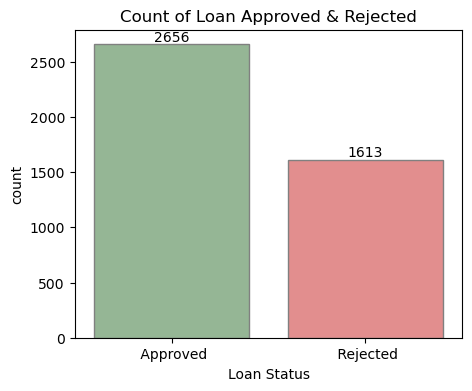

In [24]:
plt.figure(figsize=(5,4))

#define colour for the graph
colors ={'Approved': 'darkseagreen', 'Rejected':'lightcoral'}
sns.countplot(data=loandata, x='loan_status', palette=colors.values(), edgecolor='grey')
loanstatus_counts = loandata['loan_status'].value_counts() # get counts of each category
for i, count in enumerate(loanstatus_counts):
    plt.text(i, count+0.2, str(count), ha='center', va='bottom')
    
plt.xlabel('Loan Status')
plt.title('Count of Loan Approved & Rejected')
plt.show()

Approved rows = 62.2% Rejected rows = 37.8%
The dataset is slightly imbalanced but we can work around this, no need to rebalance the dataset.

**EDUCATION**

In [25]:
loandata['education'].value_counts()

 Graduate        2144
 Not Graduate    2125
Name: education, dtype: int64

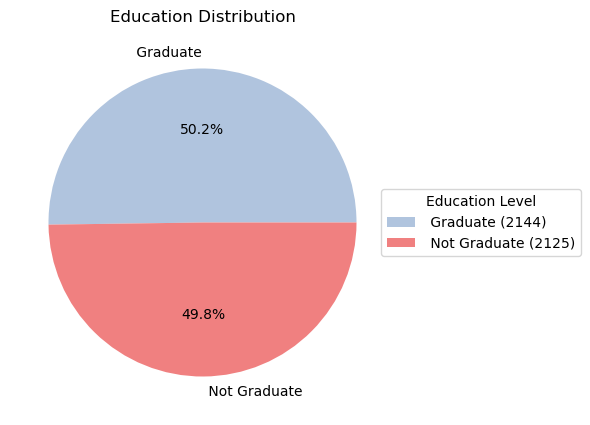

In [26]:
education_counts = loandata['education'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=['lightsteelblue', 'lightcoral'])

# Displaying the counts of graduates and non-graduates
legend_labels = [f'{index} ({count})' for index, count in zip(education_counts.index, education_counts)]
plt.legend(legend_labels, title="Education Level", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Education Distribution')
plt.show()

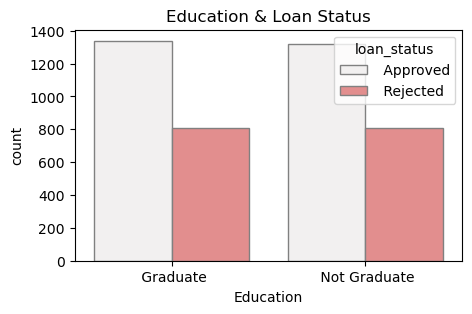

In [27]:
# plotting EDUCATION against LOAN STATUS 
plt.figure(figsize = (5,3))
sns.countplot(loandata, x = 'education', hue='loan_status', color='lightcoral', edgecolor='grey')
plt.xlabel("Education")
plt.title("Education & Loan Status")
plt.show()

The counts on loan status based on education are approximately the same. It seems like the education of an applicant - whether he/she is a graduate or not a graduate has no direct effects on the loan status. 
Let's examine whether the education affects other variables in the dataset. 

In [28]:
education = loandata.groupby(["education"], as_index=False).agg(
    count_by_education=("education", "count"),
    median_annual_income=("income_annum", "median"),
    average_loan_amount=("loan_amount", "mean"), 
    average_credit_score = ("cibil_score", "mean"),
    average_loan_term = ("loan_term", "mean"),
    avg_residential_value = ('residential_assets_value', "mean"),
    avg_commerical_value = ( 'commercial_assets_value', "mean"),
    avg_luxury_value = ( 'luxury_assets_value', "mean"),
    avg_bank_value = ('bank_asset_value', "mean")
    
).round(2).reset_index(drop=True)

education

education  count_by_education  median_annual_income  \
0       Graduate                2144             5100000.0   
1   Not Graduate                2125             5000000.0   

   average_loan_amount  average_credit_score  average_loan_term  \
0          15229151.12                599.14              10.85   
1          15036894.12                600.74              10.95   

   avg_residential_value  avg_commerical_value  avg_luxury_value  \
0             7543376.87            4943610.07       15239319.03   
1             7401223.53            5002964.71       15012282.35   

   avg_bank_value  
0      5007182.84  
1      4945929.41

*The education status of the applicant has no meaningful impact on all the other variables in the dataset. Therefore, EDUCATION is not one of the determining factor of LOAN STATUS.*

**SELF EMPLOYED**

In [29]:
loandata['self_employed'].value_counts()

 Yes    2150
 No     2119
Name: self_employed, dtype: int64

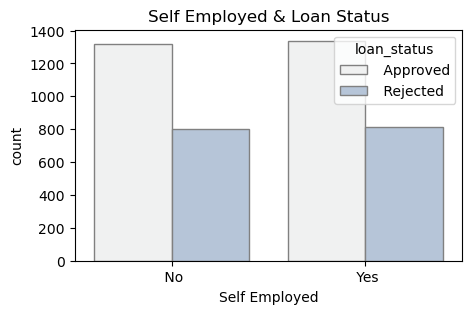

In [30]:
# plotting SELF EMPLOYED against LOAN STATUS 
plt.figure(figsize = (5,3))
sns.countplot(loandata, x = 'self_employed', hue='loan_status', color='lightsteelblue', 
              edgecolor= 'grey')
plt.xlabel("Self Employed")
plt.title("Self Employed & Loan Status")
plt.show()

The counts on LOAN STATUS based on SELF EMPLOYED are approximately the same. It seems like whether the applicant is self employed or not has no direct effects on the loan status. 
Let's examine whether the education affects other variables in the dataset. 

In [31]:
#Create a summary dataframe grouped by the SELF EMPLOYED category - Yes & No, that provides aggregated statistics (mean, median) 
#for numerical variables in dataset. This is useful for analysing whether being self-employed vs not self-employed affects other attributes.

self_employed = loandata.groupby(["self_employed"], as_index=False).agg(
    count=("education", "count"),
    median_annual_income=("income_annum", "median"),
    average_loan_amount=("loan_amount", "mean"), 
    average_credit_score = ("cibil_score", "mean"),
    average_loan_term = ("loan_term", "mean"),
    avg_residential_value = ('residential_assets_value', "mean"),
    avg_commerical_value = ( 'commercial_assets_value', "mean"),
    avg_luxury_value = ( 'luxury_assets_value', "mean"),
    avg_bank_value = ('bank_asset_value', "mean")
).round(2).reset_index(drop=True)

self_employed


self_employed  count  median_annual_income  average_loan_amount  \
0            No   2119             5100000.0          15120245.40   
1           Yes   2150             5100000.0          15146465.12   

   average_credit_score  average_loan_term  avg_residential_value  \
0                600.78              10.88             7432373.76   
1                599.10              10.92             7512279.07   

   avg_commerical_value  avg_luxury_value  avg_bank_value  
0            5052713.54       15085842.38       4977395.0  
1            4894744.19       15166186.05       4976000.0

*The self employed status of the applicant has no meaningful impact on all the other variables in the dataset. Therefore, SELF EMPLOYED is not one of the determining factor of LOAN STATUS.*

**NUMBER OF DEPENDENTS**

In [32]:
loandata['no_of_dependents'].value_counts()

4    752
3    727
0    712
2    708
1    697
5    673
Name: no_of_dependents, dtype: int64

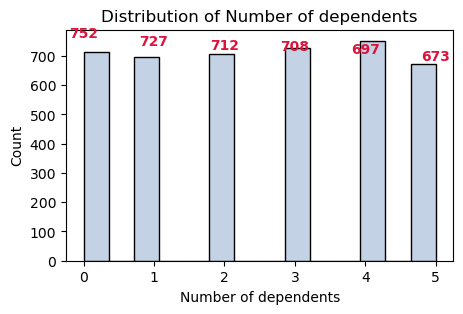

In [33]:
# Plot No. of Dependents into a graph to see its distribution
plt.figure(figsize = (5,3))

dependents_count = loandata['no_of_dependents'].value_counts()
sns.histplot(loandata['no_of_dependents'], color= 'lightsteelblue')
# displaying count in the graph
for i, count in enumerate(dependents_count):
    plt.text(i, count+0.5, str(count), ha='center', va='bottom', color = 'crimson', fontsize=10, weight='bold')

plt.xlabel("Number of dependents")
plt.title("Distribution of Number of dependents")

plt.show()

The distribution of NO_OF_DEPENDENTS is roughly even across the 6 levels, which aids in our fair analysis. 

In [34]:
#Use cross tabulation to analyse the relationship between NO OF DEPENDENTS and LOAN STATUS
cross_dependents = pd.crosstab(index=loandata['no_of_dependents'], columns=loandata['loan_status'])
cross_dependents['Approved_percentage'] = (cross_dependents[' Approved']/(cross_dependents[' Approved'] + cross_dependents[' Rejected'])) * 100
cross_dependents['Rejected_percentage'] = (cross_dependents[' Rejected']/(cross_dependents[' Approved'] + cross_dependents[' Rejected'])) * 100
cross_dependents

loan_status        Approved   Rejected  Approved_percentage  \
no_of_dependents                                              
0                       457        255            64.185393   
1                       430        267            61.692970   
2                       441        267            62.288136   
3                       457        270            62.861073   
4                       465        287            61.835106   
5                       406        267            60.326895   

loan_status       Rejected_percentage  
no_of_dependents                       
0                           35.814607  
1                           38.307030  
2                           37.711864  
3                           37.138927  
4                           38.164894  
5                           39.673105

/var/folders/31/x0vqwmsx3hn5lk5qb7wf9j440000gn/T/ipykernel_87294/1822046286.py:4: UserWarning: 
The markers list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=cross_dependents, dashes=False, markers="o", palette=custom_colors)


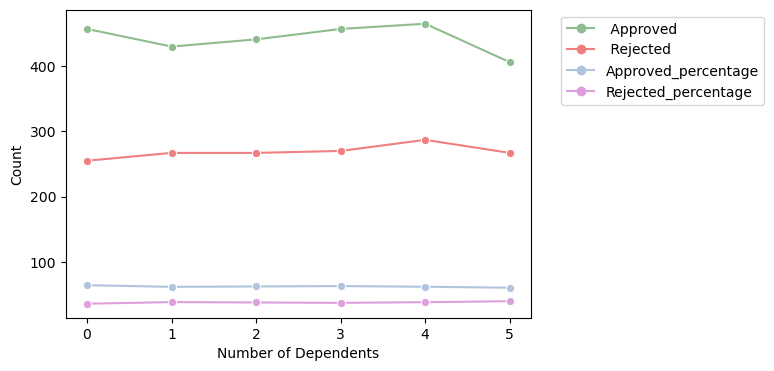

In [35]:
#Plotting the findings from cross tab into a graph 
custom_colors= ['darkseagreen', 'lightcoral','lightsteelblue','plum']
plt.figure(figsize = (6,4))
sns.lineplot(data=cross_dependents, dashes=False, markers="o", palette=custom_colors)
plt.ylabel("Count")
plt.xlabel("Number of Dependents")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()


The green line (approved line) & red line (rejected line) represents the count of approved loans categorised by the number of dependents. The green line is at a higher level than the red line which just shows that there are more approved loans than rejected loans at each number of dependents. 

Looking at the blue and purple lines at the bottom, it represents the percentage of applicants being approved or rejected, categorised by number of dependents. The 2 percentage lines are fairly flat without any steep gradient, although we can observed from the approved line above that there are steep drops from 0 to 1 dependent and 4 to 5 dependent. 
Therefore, there are no obvious trend or relationship between NO OF DEPENDENTS & LOAN STATUS

# Statistical Tests

In our previous section, we have concluded that variables: NO OF DEPENDENTS, EDUCATION, SELF EMPLOYED have no significant relationship with LOAN STATUS. We will perform some additional tests below to confirm our hypothesis. 

**Chi Square Test**

The chi-square test is a statistical method used to determine whether there is a significant association (or dependency) between categorical variables in a contingency table. It assesses whether the observed distribution of categorical data significantly differs from the expected distribution under the assumption of independence between the variables.

In [36]:
from scipy import stats
#NO OF DEPENDENTS & LOAN STATUS
# Create a contingency table (cross-tabulation) between 'NO OF DEPENDENTS' and 'LOAN STATUS'
contingency_table = pd.crosstab(loandata['no_of_dependents'], loandata['loan_status'])

# Perform Chi-Square test of independence
chi2_value, p_value, degrees_of_freedom, expected_freq_table = stats.chi2_contingency(contingency_table)
    
# Print the results of the Chi-Square test
print('no_of_dependents:')
print(f"Chi-Square Value: {chi2_value:.4f}")
print(f"p-value: {p_value:.4f}")
print("Degrees of Freedom:", degrees_of_freedom)
print("Expected Frequencies Table:")
print(expected_freq_table)

no_of_dependents:
Chi-Square Value: 2.4542
p-value: 0.7834
Degrees of Freedom: 5
Expected Frequencies Table:
[[442.97774654 269.02225346]
 [433.6453502  263.3546498 ]
 [440.48910752 267.51089248]
 [452.31014289 274.68985711]
 [467.8641368  284.1358632 ]
 [418.71351605 254.28648395]]


The chi-square test yielded a p-value of 0.78, indicating that there is no significant evidence to reject the null hypothesis. Therefore, based on the analysis, we do not find a significant association between the NO OF DEPENDENTS variable and the LOAN STATUS variable in the dataset. The data does not provide sufficient evidence to conclude that there is a meaningful relationship between the number of dependents and the loan approval status. The p-value of 0.78 suggests that any observed differences in the distribution of no_of_dependents between the 'Approved' and 'Rejected' groups could very well have occurred by chance alone.

In [37]:
#EDUCATION & LOAN STATUS
# Create a contingency table (cross-tabulation) between 'NO OF DEPENDENTS' and 'LOAN STATUS'
contingency_table = pd.crosstab(loandata['education'], loandata['loan_status'])

# Perform Chi-Square test of independence
chi2_value, p_value, degrees_of_freedom, expected_freq_table = stats.chi2_contingency(contingency_table)
    
# Print the results of the Chi-Square test
print('education:')
print(f"Chi-Square Value: {chi2_value:.4f}")
print(f"p-value: {p_value:.4f}")
print("Degrees of Freedom:", degrees_of_freedom)
print("Expected Frequencies Table:")
print(expected_freq_table)

education:
Chi-Square Value: 0.0840
p-value: 0.7720
Degrees of Freedom: 1
Expected Frequencies Table:
[[1333.91051769  810.08948231]
 [1322.08948231  802.91051769]]


The chi-square test yielded a p-value of 0.77, indicating that there is no significant evidence to reject the null hypothesis. Therefore, based on the analysis, we do not find a significant association between the EDUCATION variable and the LOAN STATUS variable in the dataset. The data does not provide sufficient evidence to conclude that there is a meaningful relationship between the education and the loan approval status. 

In [38]:
#SELF EMPLOYED & LOAN STATUS
# Create a contingency table (cross-tabulation) between 'NO OF DEPENDENTS' and 'LOAN STATUS'
contingency_table = pd.crosstab(loandata['self_employed'], loandata['loan_status'])

# Perform Chi-Square test of independence
chi2_value, p_value, degrees_of_freedom, expected_freq_table = stats.chi2_contingency(contingency_table)
    
# Print the results of the Chi-Square test
print('self_employed:')
print(f"Chi-Square Value: {chi2_value:.4f}")
print(f"p-value: {p_value:.4f}")
print("Degrees of Freedom:", degrees_of_freedom)
print("Expected Frequencies Table:")
print(expected_freq_table)

self_employed:
Chi-Square Value: 0.0000
p-value: 1.0000
Degrees of Freedom: 1
Expected Frequencies Table:
[[1318.35652378  800.64347622]
 [1337.64347622  812.35652378]]


The chi-square test yielded a p-value of 1.0, indicating that there is no significant evidence to reject the null hypothesis. Therefore, based on the analysis, we do not find a significant association between the SELF EMPLOYED variable and the LOAN STATUS variable in the dataset. The data does not provide sufficient evidence to conclude that there is a meaningful relationship between whether applicant is self employed and the loan approval status. 

**ANOVA**

ANOVA (Analysis of Variance) is a statistical method used to compare means among three or more groups to determine whether there are statistically significant differences between these groups. It is primarily designed to analyze differences in means across groups defined by categorical variables, specifically when the dependent variable is continuous (numeric).

We will use LOAN AMOUNT (numerical) as the dependent variable & NO OF DEPENDENTS, EDUCATION, SELF EMPLOYED as independent variables. The aim is to analyse how the independent variable might collectively affect the LOAN AMOUNT - whether there are statistically significant differences in LOAN AMOUNT based on different combination of the independent variables defined above.  

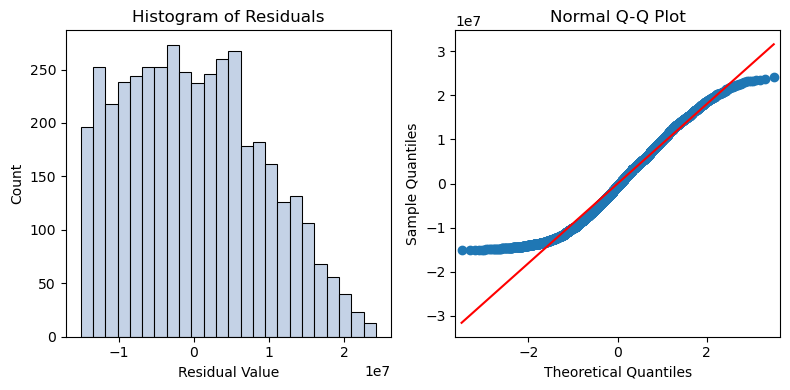

In [39]:
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Create subset & define formula for OLS regression
ols_data = loandata[['loan_amount','no_of_dependents','education','self_employed']]
ols_formula = "loan_amount ~ C(no_of_dependents) + C(education) + C(self_employed)"
OLS = ols(formula = ols_formula, data = ols_data)
ols_model = OLS.fit() # fit the OLS model

#Check linearity 
X_ols = ols_data[['no_of_dependents', 'education', 'self_employed']]
fitted_values = ols_model.fittedvalues
residuals = ols_model.resid

#create diagnostic plots 
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Histogram of residuals
sns.histplot(residuals, ax=axes[0], color='lightsteelblue')
axes[0].set_title("Histogram of Residuals")
axes[0].set_xlabel("Residual Value")

# Normal Q-Q plot of residuals
sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title("Normal Q-Q Plot")

plt.tight_layout()
plt.show()



From the histogram on the left, the distribution of the residuals is a right-skewed distribution. 
In the Q-Q plot on the right, we observe a straight diagonal line extending from the bottom left to the upper right. The blue markers in the Q-Q plot closely align with this red diagonal line without significant deviation, indicating approximate normality in the distribution of residuals.

A Q-Q (quantile-quantile) plot is used to visually assess whether a dataset follows a specific probability distribution, such as a normal distribution.

**Homoscedascity**: assumption that the variability (or spread) of the residuals (the differences between observed values and predicted values) is consistent across all levels of the independent variables.
It is an important assumption in ANOVA test to ensure the validity & reliabilty of the test.

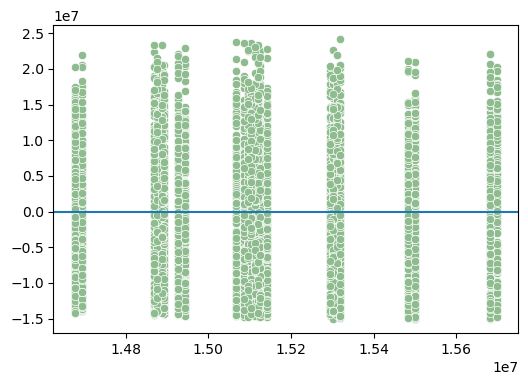

In [40]:
#Homoscedascity
# Scatterplot of fitted values vs. residuals
plt.figure(figsize = (6,4))
fig = sns.scatterplot(x=fitted_values, y=residuals, color='darkseagreen')

# Add reference line at residuals = 0
fig.axhline(0)
plt.show()


In the scatter plot above, the data points seem to be scattere randomly across the line where residual = 0, thus the assumption of homoscedascity is likely met. 

In [41]:
# Perform ANOVA and display summary
anova_result = sm.stats.anova_lm(ols_model, typ=2)
print("ANOVA Summary:")
print(anova_result)

ANOVA Summary:
                           sum_sq      df         F    PR(>F)
C(no_of_dependents)  2.747923e+14     5.0  0.671513  0.645062
C(education)         4.195183e+13     1.0  0.512591  0.474059
C(self_employed)     3.389126e+11     1.0  0.004141  0.948694
Residual             3.487321e+17  4261.0       NaN       NaN


**C(no_of_dependents)**:
The p-value (0.645062) is greater than the significance level of 0.05. This shows that there is no significant evidence to reject the null hypothesis, indicating that the no_of_dependents does not have a significant relationship with the loan_amount.

**C(education)**:
The p-value (0.474059) is also greater than 0.05. There is no significant evidence to suggest that education level has a significant relationship with the loan_amount.

**C(self_employed)**:
The p-value (0.948694) is way above 0.05. Once again, there is no significant evidence to indicate that being self-employed has a significant relationship with the loan_amount.

In all three cases, the p-values are above the common threshold of 0.05, suggesting that these categorical variables are not significantly associated with the loan amount based on the ANOVA tests.

In [42]:
loandata.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

# Machine Learning: Logistic Regression

In [43]:
#drop the variables that we concluded has no relationship in the previous section
columns_to_drop= ['education','self_employed', 'no_of_dependents']
loandata_new= loandata.drop(columns_to_drop, axis=1)

In [44]:
loandata_new.columns

Index(['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [45]:
#convert loan_status categorical varaibel to dummy variable (binary 0/1)
loandata_dummies = pd.get_dummies(loandata_new)
loandata_dummies.columns

Index(['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status_ Approved',
       'loan_status_ Rejected'],
      dtype='object')

In [46]:
#removing the column loan_status_rejected since we are trying to predict loan approval, 
#we do not need a separeate column for rejected status. The absence of the approved class implicitly 
#represents the other class (rejected)
loandata_dummies.rename(columns = {'loan_status_ Approved':'loan_status'}, inplace= True)
loandata_dummies = loandata_dummies.drop(['loan_status_ Rejected'], axis =1)

In [47]:
loandata_dummies.shape

(4269, 9)

In [48]:
loandata_dummies.dtypes

income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
loan_status                 uint8
dtype: object

<Axes: >

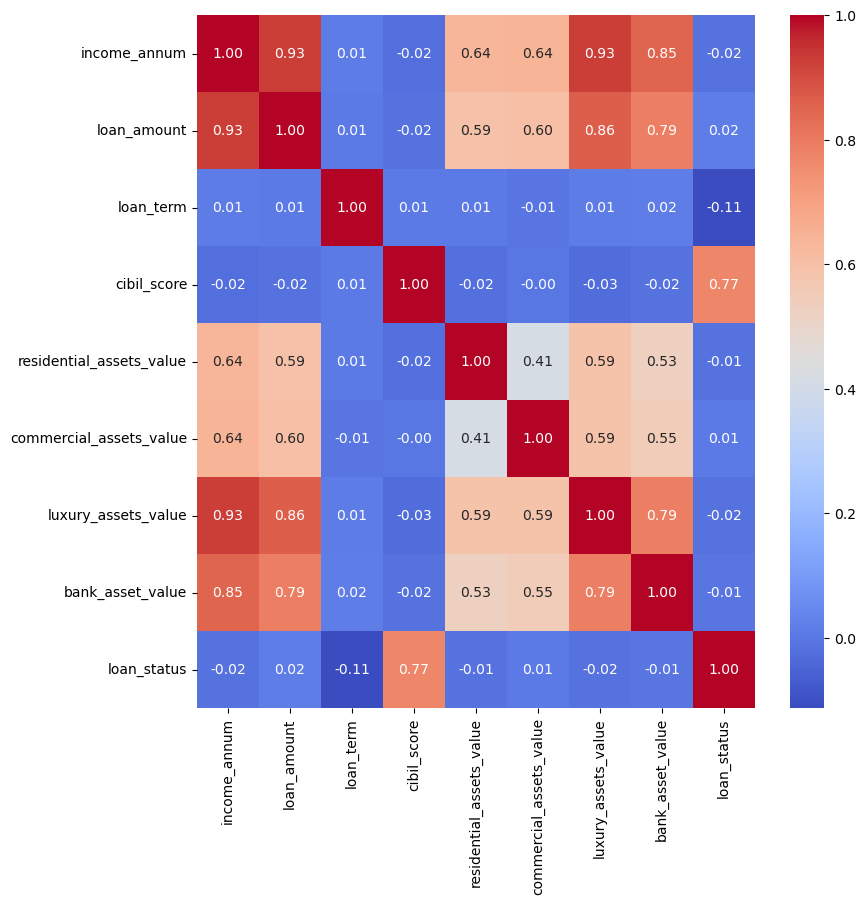

In [49]:
#checking correlation score again
loandata_corr = loandata_dummies.corr()
plt.figure(figsize = (9,9))
sns.heatmap(loandata_corr, annot=True, fmt='.2f', cmap='coolwarm')

From the heatmap, we can observe that: 
- cibil_score has highest positive correlation with loan_status
- there are strong linear relationships between income_annum & loan_amount, luxury_assets_value & income_annum, bank_asset_value & income_annum and luxury_assets_value & bank_asset_value (as mentioned previously)

In [50]:
y = loandata_dummies['loan_status'] #response
X = loandata_dummies.drop(['loan_status'], axis =1) #predictor 


In [51]:
#splitting train set & test set
X_temp, X_test, y_temp, y_test = train_test_split(X, y,  test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [52]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2561, 8), (2561,), (854, 8), (854,), (854, 8), (854,))

**Standardisation**: A preprocessing technique commonly used in machine learning to transform numerical features so that they have a mean of 0 and a standard deviation of 1. It helps to bring all features to a similar scale, so that all features contribute equally to the model training process.

In [53]:
#standardise dataset
stand_scaler = StandardScaler()
stand_scaler.fit(X_train)
X_train_stand = stand_scaler.transform(X_train)
X_val_stand = stand_scaler.transform(X_val)
X_test_stand = stand_scaler.transform(X_test)

In [54]:
clf = LogisticRegression().fit(X_train_stand,y_train)

In [55]:
coefficients = clf.coef_[0]
intercept = clf.intercept_

variables = list(X_train.columns)

clf_summary = []
for var, coef in zip(variables, coefficients):
    clf_summary.append([var, coef])

clf_summary.append(["Intercept", intercept[0]])


print(tabulate(clf_summary, headers=["Variables", "Coefficient"], tablefmt="grid"))

+--------------------------+---------------+
| Variables                |   Coefficient |
+==========================+===============+
| income_annum             |    -1.66741   |
+--------------------------+---------------+
| loan_amount              |     1.1483    |
+--------------------------+---------------+
| loan_term                |    -0.865514  |
+--------------------------+---------------+
| cibil_score              |     4.12359   |
+--------------------------+---------------+
| residential_assets_value |     0.0612439 |
+--------------------------+---------------+
| commercial_assets_value  |     0.035288  |
+--------------------------+---------------+
| luxury_assets_value      |     0.340216  |
+--------------------------+---------------+
| bank_asset_value         |     0.184455  |
+--------------------------+---------------+
| Intercept                |     1.82502   |
+--------------------------+---------------+


In [56]:
y_lr = clf.predict(X_val_stand) 


In [57]:
print("Results:")
print('Accuracy:', '%.3f' % accuracy_score(y_val, y_lr))
print('Precision:', '%.3f' % precision_score(y_val, y_lr))
print('Recall:', '%.3f' % recall_score(y_val, y_lr))
print('F1 Score:', '%.3f' % f1_score(y_val, y_lr))

Results:
Accuracy: 0.917
Precision: 0.934
Recall: 0.925
F1 Score: 0.930


# Machine Learning: Random Forest

In [58]:
#hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 150], 
#This hyperparameter (n_estimators) determines the number of trees in the random forest ensemble.
#The random search will explore these three values to determine the optimal number of trees for the random forest
    
    'max_depth': [None, 10, 20],
#This hyperparameter controls the maximum depth of each tree in the random forest.
#None represents no maximum depth (i.e., trees are expanded until all leaves are pure or until min_samples_split conditions are met).
   
    'min_samples_split': [2, 5, 10],
#This hyperparameter sets the minimum number of samples required to split an internal node.
   
    'min_samples_leaf': [1, 2, 4]
 #This hyperparameter specifies the minimum number of samples required to be at a leaf node (end of a tree).
}

rf = RandomForestClassifier()

#RandomizedSearchCV is used for hyperparameter tuning through random search.
#It helps identify optimal model settings while saving computational resources compared to exhaustive grid search methods
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train) 

best_params = random_search.best_params_
best_forest = random_search.best_estimator_


**Hyperparameter Description:**

min_samples_leaf: sets the minimum number of samples required to be at a leaf node (end of a tree branch).
-  higher min_samples_leaf value can enforce a constraint on the tree's depth and complexity by ensuring that each leaf node contains a minimum number of samples.
- increasing min_samples_leaf can lead to smaller and more interpretable trees, reducing the risk of overfitting by preventing the model from capturing noise and outliers.

min_samples_split: specifies the minimum number of samples required to split an internal node.
- A higher min_samples_split value can prevent the tree from creating nodes that have very few samples, which helps in avoiding overfitting

In [59]:
#After fitting the RandomizedSearchCV object, we retrieve the best parameters (best_params) 
#and the best estimator (best_forest).
best_params, best_forest

({'n_estimators': 150,
  'min_samples_split': 10,
  'min_samples_leaf': 4,
  'max_depth': 10},
 RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                        n_estimators=150))

In [60]:
rf_opt = RandomForestClassifier(n_estimators = 150, max_depth = None, 
                                min_samples_leaf = 1, min_samples_split = 5,random_state = 0)
rf_opt.fit(X_train, y_train)
y_rf = rf_opt.predict(X_val)


In [61]:
print('Train Set:')
print('Accuracy:', '%.3f' % accuracy_score(y_val, y_rf))
print('Precision:', '%.3f' % precision_score(y_val, y_rf))
print('Recall:', '%.3f' % recall_score(y_val, y_rf))
print('F1 Score:', '%.3f' % f1_score(y_val, y_rf))

Train Set:
Accuracy: 0.979
Precision: 0.977
Recall: 0.988
F1 Score: 0.982


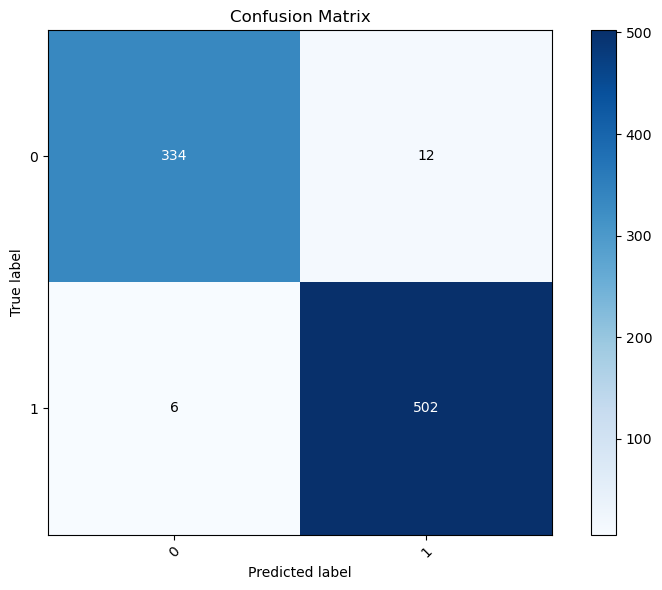

In [62]:
# Calculate confusion matrix
cm = metrics.confusion_matrix(y_val, y_rf, labels=rf_opt.classes_)

# Define custom colors for the confusion matrix
colors = ['lightsteelblue', 'lightcoral']  # Customize colors as needed based on class labels

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Define tick marks and axis labels
tick_marks = np.arange(len(rf_opt.classes_))
plt.xticks(tick_marks, rf_opt.classes_, rotation=45)
plt.yticks(tick_marks, rf_opt.classes_)

# Display actual values inside the heatmap
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

# Add labels
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.tight_layout()
plt.show()

- True negatives (upper left): The number of applications that were rejected that the model accurately predicted were rejected.
- False negatives (bottom left): The number of applications that were approved that the model inaccurately predicted were rejected.
- False positives (upper right): The number of applications that were rejected that the model inaccurately predicted were approved.
- True positives (bottom right): The number of applications that were approved that the model accurately predicted were approved.

In [63]:
y_test_rf = rf_opt.predict(X_test)

print('Test Set:')
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_test_rf))
print('Precision:', '%.3f' % precision_score(y_test, y_test_rf))
print('Recall:', '%.3f' % recall_score(y_test, y_test_rf))
print('F1 Score:', '%.3f' % f1_score(y_test, y_test_rf))


Test Set:
Accuracy: 0.973
Precision: 0.976
Recall: 0.981
F1 Score: 0.979


# Overall Analysis

The Random Forest model performed better performance than the Logistic Regression Model, hence, we are going to use the RF model!

The scores we've obtained on the test set are remarkably similar to the validation(train) set scores, which is a positive indication that model's performance generalizes well to new and unseen data.

**Accuracy**: Both on the validation set and the test set, we have an accuracy of around 0.973 to 0.979. This suggests that our model is correctly classifying around 97.2% to 97.9% of instances in both datasets.

**Precision**: Precision measures how many of the predicted positive instances are actually positive. With a precision of around 0.977 in both sets, it means that about 97.7% of the instances predicted as positive by our model are truly positive.

**Recall**: Recall, also known as sensitivity or true positive rate, indicates how many of the actual positive instances our model is capturing. With a recall of around 0.981 to 0.988 in the sets, it means that our model is correctly identifying about 98.4% of the actual positive instances.

**F1 Score**: The F1 score is the harmonic mean of precision and recall and provides a balanced view of a model's performance. With an F1 score of around 0.979 to 0.982 in the sets, it indicates that the model is achieving a balanced trade-off between precision and recall.

The consistent metrics between the validation and test sets suggest that our model avoids overfitting to the validation data and is likely to perform well on new data. 

Overall, this performance underscores the Random Forest's effectiveness in making accurate and robust predictions across different datasets.

**Assessing the Importance of Variables**

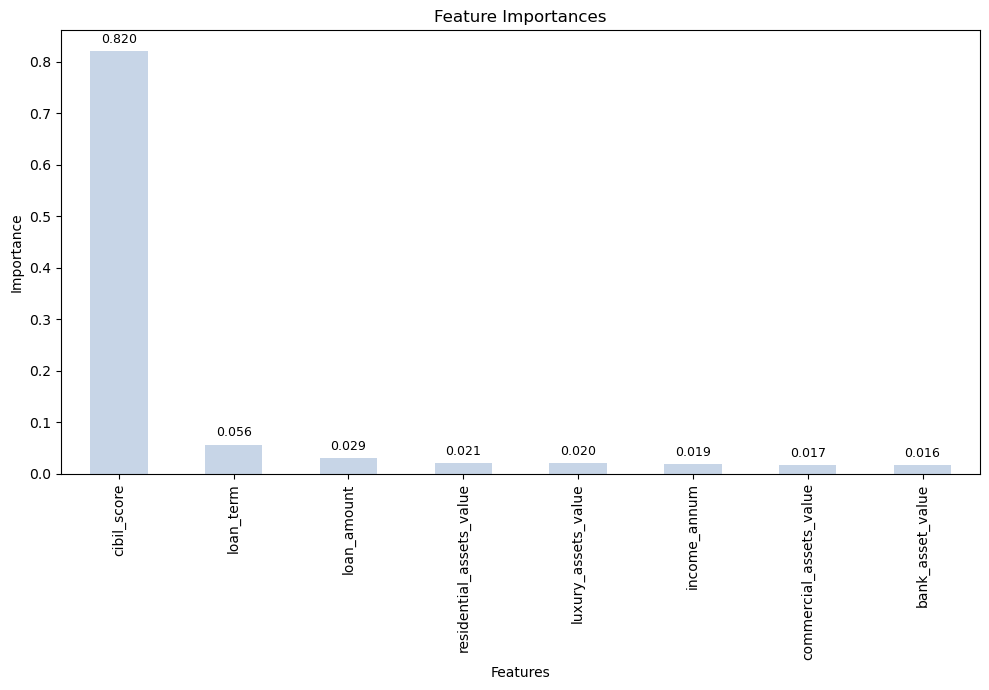

In [64]:
#Importance of variables 
importances = rf_opt.feature_importances_
features = X.columns

# Create a DataFrame of feature importances with corresponding feature names
forest_importances = pd.Series(importances, index=features)

# Sort the Series by importance in descending order
forest_importances_sorted = forest_importances.sort_values(ascending=False)

# Create a bar plot of feature importances
plt.figure(figsize=(10, 7))
forest_importances_sorted.plot(kind='bar', color='lightsteelblue', alpha=0.7)

# Add labels and title
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")

# Display the numerical values on top of each bar
for i, v in enumerate(forest_importances_sorted):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In our analysis, cibil_score emerges as the most important factor affecting the prediction outcome of loan status. However, it is crucial to remember that correlation does not imply causation. While cibil_score plays a pivotal role in our model's predictions, its importance reflects patterns and associations identified within the data.

Cibil_score, representing credit scores in our context, is significant, but other factors, potential interactions between features, and data noise can also contribute to these findings. Therefore, a comprehensive understanding of the model's behavior requires consideration of these aspects. The insights from the feature importance analysis can guide us in making informed decisions and refining our strategies. It's important to interpret these findings alongside other domain knowledge and analysis.


# Loan Status Prediction Program

**Description of Our Program** 

Our program aims to provide applicants with a quick way to predict the outcome of their loan application. 

Some features of our program include: 
1) allows for customisable prediction by allowing users to input their data 
2) informs user of the probability of approval 
3) provides users with the factors that contributed to their rejection 
4) these factors are also presented to the user in order of importance 

In [65]:
# Assume rf_opt is your trained Random Forest classifier
# Example:
# rf_opt = RandomForestClassifier(n_estimators=150, max_depth=None, min_samples_leaf=1, min_samples_split=5, random_state=0)
# Make sure to load your trained model here

# Define a function to preprocess user input
def preprocess_input(input_data):
    # Create a DataFrame from user input
    user_data = pd.DataFrame([input_data])
    return user_data

# Define a function to predict loan status and explain prediction
def predict_loan_status(user_data, model):
    # Use the model to predict loan status and probabilities
    prediction = model.predict(user_data)
    probabilities = model.predict_proba(user_data)
    
    # Determine loan status and probability of approval
    loan_status = "Approved" if prediction[0] == 1 else "Rejected"
    probability_approved = probabilities[0][1]  # Probability of approval (class 1)
    
    # Get feature importances
    feature_importances = model.feature_importances_
    features = user_data.columns.tolist()
    important_features = dict(zip(features, feature_importances))
    important_features_sorted = dict(sorted(important_features.items(), key=lambda x: x[1], reverse=True))
    
    return loan_status, probability_approved, important_features_sorted

# Function to interactively gather user input
def get_user_input():
    input_data = {}
    input_data['income_annum'] = float(input("Enter your annual income: "))
    input_data['loan_amount'] = float(input("Enter the loan amount: "))
    input_data['loan_term'] = float(input("Enter your loan term (in years): "))
    input_data['cibil_score'] = float(input("Enter your credit score: "))
    input_data['residential_assets_value'] = float(input("Enter your residential assets value: "))
    input_data['commercial_assets_value'] = float(input("Enter your commercial assets value: "))
    input_data['luxury_assets_value'] = float(input("Enter your luxury assets value: "))
    input_data['bank_asset_value'] = float(input("Enter your bank asset value: "))
    
    
    return input_data

# Main function to run the loan status prediction program
def loan_status_prediction():
    print("Welcome to Loan Status Prediction Program!\n")
    
    # Get user input
    user_input = get_user_input()
    
    # Preprocess user input
    user_data = preprocess_input(user_input)
    
    # Predict loan status using the trained model
    loan_status, probability_approved, important_features = predict_loan_status(user_data, rf_opt)
    
    # Display prediction results
    print("\nPrediction Results:")
    print(f"Loan Status: {loan_status}")
    print(f"Probability of Approval: {probability_approved:.2f}")
    
    print("\nTop Contributing Factors:")
    for feature, importance in important_features.items():
        print(f"{feature}: {importance:.4f}")
    
    print("\nThank you for using the Loan Status Prediction Program!")

# Run the main function
loan_status_prediction()


Welcome to Loan Status Prediction Program!

Enter your annual income: 2300000
Enter the loan amount: 98800000
Enter your loan term (in years): 18
Enter your credit score: 336
Enter your residential assets value: 1800000
Enter your commercial assets value: 800000
Enter your luxury assets value: 5200000
Enter your bank asset value: 1500000

Prediction Results:
Loan Status: Rejected
Probability of Approval: 0.08

Top Contributing Factors:
cibil_score: 0.8199
loan_term: 0.0562
loan_amount: 0.0294
residential_assets_value: 0.0212
luxury_assets_value: 0.0203
income_annum: 0.0192
commercial_assets_value: 0.0173
bank_asset_value: 0.0164

Thank you for using the Loan Status Prediction Program!
